In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy
import cv2
import matplotlib.pyplot as plt

In [226]:
from srn import srn
handpose = srn.handpose

In [163]:
ESSAI = './dataset/gesture_1/finger_1/subject_1/essai_1/'

In [164]:
true_I = np.loadtxt(f'{ESSAI}/skeletons_image.txt', dtype=np.float16)
true_W = np.loadtxt(f'{ESSAI}/skeletons_world.txt', dtype=np.float16)

true_I = true_I.reshape((-1, 22, 2))
true_I = np.delete(true_I, 1, 1) # 3, 4

true_W = true_W.reshape((-1, 22, 3))
true_W = np.delete(true_W, 1, 1) # 4, 5, 6

true_I.shape, true_W.shape

((95, 21, 2), (95, 21, 3))

In [165]:
frame = 0
d = cv2.imread(ESSAI + f'/{frame}_depth.png', cv2.IMREAD_ANYDEPTH)

In [227]:
world, img = handpose.run(ESSAI)

## Note 1

If you add cx, cy to world coordinates, you get same image coodinates

In [173]:
t = world[frame].copy()
t[:,0] = t[:,0] + cx
t[:,1] = t[:,1] + cy
t

array([[255.85786, 334.1264 , 623.6151 ],
       [271.66418, 336.92432, 625.85376],
       [285.90564, 309.01257, 576.6246 ],
       [297.40805, 289.59512, 543.70734],
       [313.50616, 279.03592, 517.84796],
       [289.45267, 258.70325, 600.788  ],
       [296.52887, 215.83688, 572.9401 ],
       [299.74402, 192.54897, 553.1357 ],
       [305.12814, 179.68967, 540.7427 ],
       [265.184  , 261.10663, 597.18835],
       [258.23016, 227.83034, 556.58887],
       [262.3088 , 247.29913, 549.10114],
       [266.40845, 265.7037 , 557.8392 ],
       [246.3486 , 265.90317, 596.25336],
       [240.79855, 242.79367, 556.0933 ],
       [245.97066, 259.72018, 555.607  ],
       [251.97328, 276.40112, 567.7063 ],
       [225.70462, 270.65866, 594.15155],
       [228.90515, 262.8852 , 563.1003 ],
       [234.48734, 273.08765, 558.64044],
       [241.69524, 287.26483, 569.10095]], dtype=float32)

In [174]:
img[frame]

array([[273.6913 , 306.56128, 623.6151 ],
       [284.9693 , 308.34277, 625.85376],
       [293.1491 , 292.852  , 576.6246 ],
       [301.04883, 280.28955, 543.70734],
       [313.966  , 273.48053, 517.84796],
       [296.6922 , 251.65063, 600.788  ],
       [301.16556, 218.28632, 572.9401 ],
       [303.17383, 198.5137 , 553.1357 ],
       [307.2523 , 186.86493, 540.7427 ],
       [278.67206, 253.64642, 597.18835],
       [270.40344, 227.92468, 556.58887],
       [273.04553, 244.26556, 549.10114],
       [276.96466, 259.22818, 557.8392 ],
       [264.6981 , 257.395  , 596.25336],
       [256.55484, 240.33035, 556.0933 ],
       [260.60266, 254.38684, 555.607  ],
       [266.45316, 267.3798 , 567.7063 ],
       [249.21   , 261.18784, 594.15155],
       [247.99835, 256.6322 , 563.1003 ],
       [251.85225, 265.278  , 558.64044],
       [258.6209 , 276.08542, 569.10095]], dtype=float32)

In [175]:
np.average(np.abs(t - img[frame])) # Average error in pixels

6.887093

## Note 2
x axis is inverted in their outputs

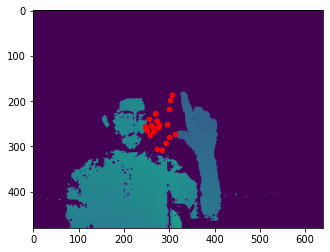

In [176]:
plt.imshow(d)
for x, y, z in img[frame]:
    c = plt.Circle((x, y), color='red')
    plt.gca().add_patch(c)
plt.show()

Mirror it on x = 320, by doing new_x = 640 - x

In [ ]:
for idx, pose in enumerate(img):
    dd = cv2.imread(ESSAI + f'/{idx}_depth.png', cv2.IMREAD_ANYDEPTH)
    plt.imshow(dd)
    for x, y, z in pose:
        c = plt.Circle((640 - x, y), color='red')
        plt.gca().add_patch(c)
    plt.show()

This output is better than the code before with center and cube modifications.

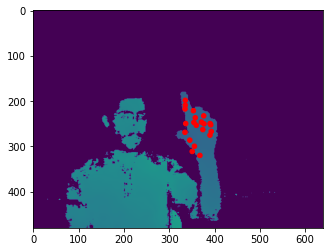

In [180]:
true_uvd = true_I[frame].copy() # actual uvd of frame 0 of essai 1
plt.imshow(d)
for x, y in true_uvd:
    c = plt.Circle((x, y), color='red')
    plt.gca().add_patch(c)
plt.show()

In [223]:
true_uvd

array([[367.8, 319.8],
       [350.8, 311. ],
       [355.8, 299.5],
       [345.5, 286. ],
       [334.8, 268.8],
       [336.5, 249.4],
       [335. , 217.1],
       [335.5, 208.8],
       [335.5, 198. ],
       [354.5, 246.9],
       [353.5, 221. ],
       [357.5, 236.5],
       [359.8, 253.1],
       [371. , 246. ],
       [376.2, 232.4],
       [376.8, 250. ],
       [374.2, 262.8],
       [390.2, 249.4],
       [391.8, 252.1],
       [392.8, 266.8],
       [390. , 275. ]], dtype=float16)

In [181]:
predicted_uvd = img[frame].copy() # predicted uvd of frame 0 of essai 1
predicted_uvd[:,0] = 640 - predicted_uvd[:,0] # mirror it
predicted_uvd # inverted

array([[366.3087 , 306.56128, 623.6151 ],
       [355.0307 , 308.34277, 625.85376],
       [346.8509 , 292.852  , 576.6246 ],
       [338.95117, 280.28955, 543.70734],
       [326.034  , 273.48053, 517.84796],
       [343.3078 , 251.65063, 600.788  ],
       [338.83444, 218.28632, 572.9401 ],
       [336.82617, 198.5137 , 553.1357 ],
       [332.7477 , 186.86493, 540.7427 ],
       [361.32794, 253.64642, 597.18835],
       [369.59656, 227.92468, 556.58887],
       [366.95447, 244.26556, 549.10114],
       [363.03534, 259.22818, 557.8392 ],
       [375.3019 , 257.395  , 596.25336],
       [383.44516, 240.33035, 556.0933 ],
       [379.39734, 254.38684, 555.607  ],
       [373.54684, 267.3798 , 567.7063 ],
       [390.78998, 261.18784, 594.15155],
       [392.00165, 256.6322 , 563.1003 ],
       [388.14777, 265.278  , 558.64044],
       [381.3791 , 276.08542, 569.10095]], dtype=float32)

In [193]:
np.abs(predicted_uvd[:,:2] - true_uvd).mean()

5.754424

## Note 3

Divide world depth by 0.00092 to get pixel depth

In [183]:
(true_W[:,:,2] / img[:,:,2]).mean()

0.00091771106

In [235]:
world

array([[[-44.02487 ,  79.43333 , 633.27106 ],
        [-31.983786,  82.72307 , 636.5479  ],
        [-22.22891 ,  62.72191 , 585.39923 ],
        ...,
        [-64.96221 ,  23.863213, 572.8618  ],
        [-58.915855,  28.159128, 563.31366 ],
        [-48.83671 ,  37.121063, 565.52716 ]],

       [[-44.902775,  78.5742  , 630.8891  ],
        [-33.74222 ,  81.856995, 634.32324 ],
        [-23.51498 ,  62.62845 , 583.2882  ],
        ...,
        [-64.92628 ,  19.521172, 570.45386 ],
        [-61.191868,  19.743114, 555.8712  ],
        [-52.551277,  27.633883, 552.04297 ]],

       [[-45.808506,  75.24219 , 628.06885 ],
        [-34.669163,  79.144775, 630.7123  ],
        [-22.741339,  60.983185, 578.97424 ],
        ...,
        [-63.78095 ,  19.822386, 570.5254  ],
        [-60.181652,  22.02808 , 559.65106 ],
        [-52.67655 ,  29.407507, 559.47534 ]],

       ...,

       [[-52.199684, 105.715485, 623.15533 ],
        [-42.140026, 110.79467 , 623.296   ],
        [-35.852043,  

In [184]:
np.average(np.abs(true_W[0][:,2] / 0.00092 - img[0][:,2])) # zcoords

16.087332

In [185]:
M = np.array([
        [440.47796631,   0.        , 316.566     ],
        [  0.        , 461.05618286, 228.322     ],
        [  0.        ,   0.        ,   1.        ]])

In [186]:
import torch

In [187]:
np.linalg.inv(M) @ img[0][0].reshape((3, 1))

array([[-447.56302336],
       [-308.15873135],
       [ 623.6151123 ]])

In [188]:
world

array([[[ -60.726154,  105.746414,  623.6151  ],
        [ -44.919815,  108.5443  ,  625.85376 ],
        [ -30.67836 ,   80.63257 ,  576.6246  ],
        ...,
        [ -87.678856,   34.50518 ,  563.1003  ],
        [ -82.09668 ,   44.70763 ,  558.64044 ],
        [ -74.88878 ,   58.884815,  569.10095 ]],

       [[ -63.002995,  100.31391 ,  620.8004  ],
        [ -48.5808  ,  103.07697 ,  622.81555 ],
        [ -31.795052,   78.76632 ,  572.0432  ],
        ...,
        [ -88.41413 ,   29.288424,  562.5786  ],
        [ -83.98984 ,   34.428844,  553.2495  ],
        [ -75.9561  ,   47.026913,  558.6531  ]],

       [[ -63.724106,   98.26795 ,  618.7464  ],
        [ -48.90377 ,  101.33543 ,  619.3795  ],
        [ -30.98916 ,   76.64468 ,  569.30994 ],
        ...,
        [ -91.697975,   30.597591,  563.98175 ],
        [ -87.05127 ,   41.10343 ,  559.8371  ],
        [ -79.85382 ,   55.29474 ,  572.18054 ]],

       ...,

       [[ -73.41698 ,  140.82213 ,  615.17126 ],
        [ -

In [203]:
np.abs(true_W[:,:,2] - img[:,:,2] * 0.00092).mean()

0.016070241

In [215]:
predicted_all_uv == img[:,:,:2].copy()
predicted_all_uv[:,:,0] = 640 - predicted_all_uv[:,:,0]
predicted_all_uv, true_I

(array([[[366.3087 , 333.43872],
         [355.0307 , 331.65723],
         [346.8509 , 347.148  ],
         ...,
         [392.00165, 383.3678 ],
         [388.14777, 374.722  ],
         [381.3791 , 363.91458]],
 
        [[368.11865, 337.11887],
         [357.7741 , 335.31448],
         [347.89844, 348.13583],
         ...,
         [392.64093, 387.61694],
         [390.28577, 382.92838],
         [383.30466, 372.80872]],
 
        [[368.7804 , 338.3961 ],
         [358.1944 , 336.18756],
         [347.39246, 349.54926],
         ...,
         [395.03345, 386.6064 ],
         [391.90765, 377.7691 ],
         [384.88934, 367.06418]],
 
        ...,
 
        [[375.98438, 306.0772 ],
         [366.0145 , 304.07297],
         [361.3708 , 323.40726],
         ...,
         [404.28406, 356.52255],
         [402.39612, 349.55695],
         [395.76526, 338.13837]],
 
        [[375.9998 , 303.7242 ],
         [365.69363, 301.53278],
         [361.92993, 323.54318],
         ...,
         [40

In [216]:
np.abs(true_I - predicted_all_uv)

array([[[  1.4413147 ,  13.688721  ],
        [  4.2807007 ,  20.657227  ],
        [  8.899109  ,  47.64801   ],
        ...,
        [  0.25164795, 131.2428    ],
        [  4.602234  , 107.971985  ],
        [  8.620911  ,  88.91458   ]],

       [[  2.6313477 ,  18.118866  ],
        [  1.0241089 ,  25.564484  ],
        [  9.6015625 ,  53.635834  ],
        ...,
        [  0.6090698 , 137.49194   ],
        [  3.9642334 , 118.178375  ],
        [ 10.195343  ,  99.558716  ]],

       [[  2.7196045 ,  20.146088  ],
        [  0.694397  ,  27.187561  ],
        [ 10.107544  ,  55.049255  ],
        ...,
        [  1.2834473 , 136.98141   ],
        [  2.5923462 , 113.519104  ],
        [  9.110657  ,  94.31418   ]],

       ...,

       [[  9.515625  ,  29.17279   ],
        [  1.9855042 ,  25.177032  ],
        [  3.8792114 ,   6.907257  ],
        ...,
        [  7.4659424 ,  80.02255   ],
        [  2.6038818 ,  59.306946  ],
        [  1.9847412 ,  37.388367  ]],

       [[  9.25

In [248]:
Xc = (img[:,:,0] - 316.566) * img[:,:,2] * 0.0092 / 440.478
Yc = (img[:,:,1] - 228.322) * img[:,:,2] * 0.0092 / 461.056

In [253]:
-Xc

array([[0.5660637 , 0.41117525, 0.28571534, ..., 0.83540815, 0.757636  ,
        0.6279849 ],
       [0.57735723, 0.43379524, 0.30225912, ..., 0.83494675, 0.7869157 ,
        0.6757713 ],
       [0.5890089 , 0.44572005, 0.29230922, ..., 0.82021415, 0.7739197 ,
        0.67737997],
       ...,
       [0.6712219 , 0.5418222 , 0.4609552 , ..., 0.9576765 , 0.90533954,
        0.8034455 ],
       [0.68225145, 0.5531319 , 0.47436884, ..., 0.9806711 , 0.92673457,
        0.8168115 ],
       [0.67689466, 0.54299664, 0.4643097 , ..., 0.96933097, 0.91476446,
        0.81974053]], dtype=float32)

In [250]:
Yc

array([[0.9768977 , 1.0173295 , 0.7714739 , ..., 0.29392064, 0.34670252,
        0.4568393 ],
       [0.9663372 , 1.0066837 , 0.77032286, ..., 0.24055801, 0.24326862,
        0.3402347 ],
       [0.9253864 , 0.97334874, 0.7500991 , ..., 0.24425973, 0.2713532 ,
        0.36203954],
       ...,
       [1.2998703 , 1.3622891 , 1.0590533 , ..., 0.6115034 , 0.6496528 ,
        0.7390569 ],
       [1.3031206 , 1.3696234 , 1.0500362 , ..., 0.62509453, 0.6783463 ,
        0.77072924],
       [1.2909073 , 1.344868  , 1.0525357 , ..., 0.6151473 , 0.6509969 ,
        0.7337866 ]], dtype=float32)

In [265]:
Zc = true_W[:,:,2]
Zc

array([[0.5913, 0.5776, 0.5576, ..., 0.5396, 0.528 , 0.531 ],
       [0.589 , 0.5757, 0.556 , ..., 0.5337, 0.5215, 0.525 ],
       [0.5894, 0.576 , 0.5566, ..., 0.533 , 0.521 , 0.524 ],
       ...,
       [0.5713, 0.556 , 0.5415, ..., 0.5083, 0.519 , 0.533 ],
       [0.5728, 0.5576, 0.542 , ..., 0.5083, 0.5186, 0.5327],
       [0.5737, 0.5586, 0.543 , ..., 0.508 , 0.518 , 0.532 ]],
      dtype=float16)

In [266]:
img[:,:,2] * 0.00092

array([[0.5826094 , 0.5856241 , 0.5385673 , ..., 0.5270329 , 0.51824856,
        0.520285  ],
       [0.580418  , 0.5835774 , 0.53662515, ..., 0.5248176 , 0.51140153,
        0.50787956],
       [0.57782334, 0.5802553 , 0.5326563 , ..., 0.5248834 , 0.514879  ,
        0.51471734],
       ...,
       [0.5733029 , 0.5734323 , 0.5324859 , ..., 0.53404194, 0.52636385,
        0.5253363 ],
       [0.5746033 , 0.57446015, 0.5333449 , ..., 0.5351846 , 0.52890027,
        0.5293052 ],
       [0.57280004, 0.57362676, 0.5330834 , ..., 0.5316232 , 0.52296585,
        0.5210806 ]], dtype=float32)